Yusuf Can İbişoğlu
195050021
Toros üniversitesi
Yazılım Geliştirme ve Proje yönetimi

In [1]:
import numpy as np
import pandas as pd

Loading data set

In [18]:
df= pd.read_csv('/content/data/dataset_heart.csv')
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


Loading aiming data column

In [19]:
df_heart= df.pop('heart disease')


In [20]:
df_heart

0      2
1      1
2      2
3      1
4      1
      ..
265    1
266    1
267    1
268    1
269    2
Name: heart disease, Length: 270, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
df_train, df_test, df_heart_train, df_heart_test= train_test_split(df, df_heart, random_state=1)

In [22]:
df_heart_test

12     1
221    2
51     1
147    2
145    2
      ..
262    2
122    2
189    2
33     2
108    2
Name: heart disease, Length: 68, dtype: int64

In [24]:
### First Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model= Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(df_train, df_heart_train, epochs=50)

Epoch 1/50
7/7 [==============================] - 1s 4ms/step - loss: -47.8314 - accuracy: 0.5644
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: -85.2575 - accuracy: 0.5644
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: -127.4153 - accuracy: 0.5644
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: -176.4872 - accuracy: 0.5644
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: -238.6360 - accuracy: 0.5644
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: -321.2563 - accuracy: 0.5644
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: -429.6889 - accuracy: 0.5644
Epoch 8/50
7/7 [==============================] - 0s 3ms/step - loss: -570.6694 - accuracy: 0.5644
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: -748.3703 - accuracy: 0.5644
Epoch 10/50
7/7 [==============================] - 0s 3ms/step - loss: -1005.8655 - accuracy: 0.5644
Epoch 11/5

Minumum Loss and maximum Accruacy !

mean absloute error = absolute difference between the actual and calculated values of each observation over the entire array

In [26]:
## Second model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM, Flatten

model3 = Sequential([

    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(df_train.shape[1],1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    LSTM(100, activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model3.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model3.fit(df_train, df_heart_train, epochs=50)

Epoch 1/50
7/7 [==============================] - 3s 8ms/step - loss: -6.2027 - accuracy: 0.4802
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: -64.2743 - accuracy: 0.5644
Epoch 3/50
7/7 [==============================] - 0s 8ms/step - loss: -285.0356 - accuracy: 0.5644
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: -1294.1754 - accuracy: 0.5644
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: -6298.3706 - accuracy: 0.5644
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: -24342.6191 - accuracy: 0.5644
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: -92288.5938 - accuracy: 0.5644
Epoch 8/50
7/7 [==============================] - 0s 8ms/step - loss: -312133.0938 - accuracy: 0.5644
Epoch 9/50
7/7 [==============================] - 0s 7ms/step - loss: -940767.0625 - accuracy: 0.5644
Epoch 10/50
7/7 [==============================] - 0s 8ms/step - loss: -2819571.0000 - accuracy: 0.

In [27]:
### third model

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model2= DecisionTreeRegressor(random_state=1, max_leaf_nodes=25)
model2.fit(df_train, df_heart_train)
result= model2.predict(df_test)
mae= mean_absolute_error(df_heart_test, result)

print(mae)

0.25243936993575367


In [28]:
result

array([1.01639344, 1.94642857, 1.01639344, 1.94642857, 1.94642857,
       1.01639344, 1.875     , 1.        , 1.01639344, 1.94642857,
       1.94642857, 1.94642857, 1.94642857, 1.        , 1.        ,
       2.        , 1.        , 2.        , 1.875     , 1.01639344,
       1.94642857, 2.        , 1.01639344, 1.01639344, 1.09090909,
       1.875     , 1.94642857, 1.01639344, 1.09090909, 1.        ,
       1.        , 1.01639344, 1.01639344, 2.        , 1.94642857,
       1.        , 1.01639344, 1.01639344, 1.01639344, 2.        ,
       1.01639344, 1.        , 2.        , 2.        , 1.        ,
       1.94642857, 1.875     , 1.94642857, 2.        , 1.94642857,
       1.01639344, 1.94642857, 1.01639344, 1.94642857, 1.09090909,
       1.        , 1.09090909, 1.94642857, 1.09090909, 1.94642857,
       1.94642857, 1.01639344, 2.        , 1.01639344, 1.94642857,
       1.94642857, 1.94642857, 1.        ])

In [31]:
df_heart_test

12     1
221    2
51     1
147    2
145    2
      ..
262    2
122    2
189    2
33     2
108    2
Name: heart disease, Length: 68, dtype: int64

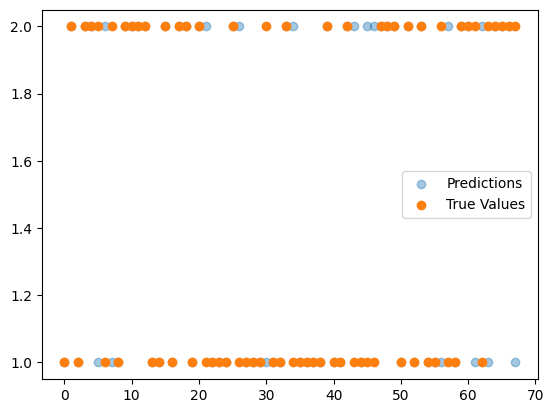

In [32]:
import matplotlib.pyplot as plt

df= [i for i in range(df_heart_test.shape[0])]
result= [2 if i>1.5 else 1 for i in result]
plt.scatter(df, result, alpha=0.4, label='Predictions')
plt.scatter(df, df_heart_test, label='True Values')
plt.legend()

(array([16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 52.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

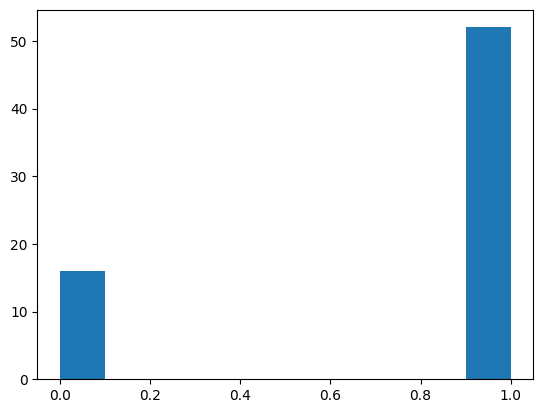

In [38]:
correct_results= [] #[1 if i==j else 0 for i in result for j in df_heart_test]
for i,j in zip(result, df_heart_test):
    if i==j:
        correct_results.append(1)
    else:
        correct_results.append(0)
plt.hist(correct_results)

So best model is the third model because

In [35]:
correct_results

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0]